<a href="https://colab.research.google.com/github/AlessioLampis/HomeworkOne/blob/master/Assigment_with_loaded_files.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


Using TensorFlow backend.


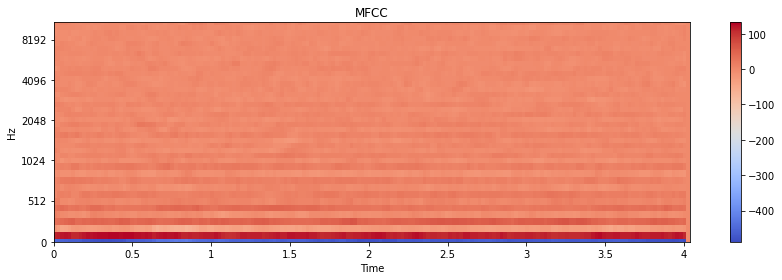

MFFCs shape: (40, 174)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 39, 173, 16)       80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 19, 86, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 19, 86, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 18, 85, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 42, 32)         0         
_________________________________________________________________
dropout

array([[ 94,   0,   0,   0,   0,   3,   0,   0,   0,   1],
       [  1,  36,   0,   0,   0,   0,   0,   0,   0,   0],
       [  2,   1,  75,   1,   0,   4,   0,   0,   2,  15],
       [  0,   1,   6,  83,   0,   1,   3,   1,   2,   2],
       [  0,   1,   1,   1,  97,   2,   0,   6,   0,   0],
       [  0,   0,   0,   0,   0,  94,   0,   1,   0,   1],
       [  0,   0,   0,   0,   0,   0,  34,   0,   0,   0],
       [  1,   0,   0,   0,   3,   0,   0, 100,   0,   1],
       [  0,   0,   0,   1,   0,   0,   0,   0,  84,   1],
       [  2,   2,   4,   0,   0,   2,   0,   0,   6,  95]])

In [0]:
##IMPORT THE FEATURES

#import Pandas library
import pandas as pd

#import the metadata file .csv
metadata = pd.read_csv('gdrive/My Drive/UrbanSound8K.csv')
metadata.head()

#import pickle to save and write file in Pickle format
import pickle

#path to the saved features as dataframe
saved_feat_path = "gdrive/My Drive/features_df.pickle"

#import the feature as a Pickle file
with open(saved_feat_path, 'rb') as data:
    featuresdf_saved = pickle.load(data)   

##IMPORT THE CNN MODEL

# import the model from json module provided by keras 
from keras.models import model_from_json

# load json file and create model
json_file = open('gdrive/My Drive/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

#load the weight from the model file into the loaded model
loaded_model.load_weights("gdrive/My Drive/model.h5")

#compile the model
loaded_model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

## EVALUATE THE MODEL

#import numpy
import numpy as np

#manipulation of dataframe into a matrix

#X contains 8732 features. Each of this is a 40x174 matrix which represent the MCCS
X = np.array(featuresdf_saved.feature.tolist())

#import librosa and librosa display to show one element of X
import librosa
import librosa.display
import matplotlib.pyplot as plt

#plot the first feature 
plt.figure(figsize=(12, 4))
librosa.display.specshow(X[7],x_axis='time', y_axis='mel')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()
print(f'MFFCs shape: {X[7].shape}')

#y is the array of class names
y = np.array(featuresdf_saved.class_label.tolist())

#preprocess the classes into an array of binary
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

le = LabelEncoder()
yy = to_categorical(le.fit_transform(y)) 
print(yy)

#split the dataset in training and testing features
from sklearn.model_selection import train_test_split 

#10% of features will be the test
x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size=0.1, random_state = 42) 

#Reshape the features in order to be used into the model
num_rows = 40
num_columns = 174
num_channels = 1

x_train = x_train.reshape(x_train.shape[0], num_rows, num_columns, num_channels)
x_test = x_test.reshape(x_test.shape[0], num_rows, num_columns, num_channels)

#calculate the accuracy of the model

loaded_model.summary()
score = loaded_model.evaluate(x_test, y_test, verbose=1)
accuracy = 100*score[1]
print(accuracy)

##TEST THE MODEL AND PRINT THE CONFUSION MATRIX

#testing the model with external audio files (not from the dataset)

#printing the confusion matrix

#import the needed library
from sklearn.metrics import confusion_matrix

#calculate the prediction 
predictions = loaded_model.predict(x_test)

#plot the matrix
confusion_matrix(y_test.argmax(axis=1), predictions.argmax(axis=1))
